# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [1]:
import pandas as pd
import numpy as np

In [2]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

### Zjistím informace o DataFramu `intakes`

In [3]:
display(intakes.head())

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
display(intakes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Dataset `intakes` obsahuje 12 příznaků:
* Animal ID
* Name - jmeno zvíře
* DateTime - čas vytvoření záznamu (den, měsíc, rok a čas)
* MonthYear - měsíc a rok, kdy byl vytvořen záznam
* Found Location - místo, kde bylo zvíře nalezeno
* Intake Type - zda je zvíře divoké, bez domova, domácí
* Intake Condition - v jakem stavu bylo zvíře přijato do útulku
* Animal Type - jaké zvíře bylo přijato do útulku
* Sex upon Intake - informace o plodnosti zvíře, kdy bylo přijato do útulku
* Age upon Intake - věk zvíře, kdy bylo přijato do útulku
* Breed - plemeno zvíře
* Color - barva zvíře

In [5]:
# detekuju chybějící hodnoty v datasetu intakes
intakes.isna().sum()

Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

1. Počet řádků datasetu `intakes` je 138585.
2. Datový typ všech příznaků je object.
3. Počet chybějicích hodnot u příznaku `Name` je 41269, u `Sex upon Intake` je 1.
4. Ostatní příznaky nemají chybějicích hodnot.

In [6]:
# počet unikátních hodnot, defaultně ignoruje NaNs
display(intakes.nunique())

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

### Zjistím informace o DataFramu `outcomes`

In [7]:
display(outcomes.head())

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [8]:
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


None

Dataset `outcomes` obsahuje 12 příznaků:
* Animal ID
* Name - jmeno zvíře
* DateTime - čas vytvoření záznamu (den, měsíc, rok a čas)
* MonthYear - měsíc a rok, kdy byl vytvořen záznam
* Date of Birth - narozeniny zvíře
* Outcome Type - následný osud zvířete po útulku
* Outcome Subtype - v jakem stavu bylo zvíře vypuštěno z útulku
* Animal Type - jaké zvíře bylo vypuštěno z útulku
* Sex upon Outcome - informace o plodnosti zvíře, kdy bylo vypuštěno z útulku
* Age upon Outcome - věk zvíře, kdy bylo vypuštěno z útulku
* Breed - plemeno zvíře
* Color - barva zvíře

In [9]:
outcomes.isna().sum()

Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

1. Počet řádků datasetu `outcomes` je 138769.
2. Datový typ všech příznaků je object.
3. Počet chybějicích hodnot u příznaku `Name` je 41255, u `Outcome Type` je 23, u `Outcome Subtype` je 75334, u `Age upon Outcome` je 5.
4. Ostatní příznaky nemají chybějicích hodnot.

In [10]:
# počet unikátních hodnot, defaultně ignoruje NaNs
display(outcomes.nunique())

Animal ID           124068
Name                 23425
DateTime            115364
MonthYear              103
Date of Birth         7576
Outcome Type             9
Outcome Subtype         26
Animal Type              5
Sex upon Outcome         5
Age upon Outcome        54
Breed                 2749
Color                  619
dtype: int64

## Příprava dat

### Chybějící hodnoty v datasetech přepišu na NaN

In [11]:
intakes = intakes.replace('Unknown', np.nan)
outcomes = outcomes.replace('Unknown', np.nan)

### Odstraním sloupec `MonthYear`
Sloupec `DateTime` ponechávám, protože kromě informací o měsíci a roce obsahuje informace o dni a čase vytvoření záznamu.

In [12]:
intakes = intakes.drop('MonthYear', axis = 1)
outcomes = outcomes.drop('MonthYear', axis = 1)

### Zkonvertuju kategorické příznaky na typ *category*

In [13]:
for col in ['Animal ID', 'Name', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color']:
    intakes[col] = intakes[col].astype('category')

In [14]:
for col in ['Animal ID','Name', 'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']:
    outcomes[col] = outcomes[col].astype('category')

### Převedu příznak `Age upon Intake` a `Age upon Outcome` na numerický příznak

In [15]:
def age_to_years (v):
    if pd.isnull(v) or float(v.split(' ')[0]) <= 0:
        return np.nan
    elif v.split(' ')[1].startswith(('day','days')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 365))
    elif v.split(' ')[1].startswith(('week', 'weeks')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 52))
    elif v.split(' ')[1].startswith(('month', 'months')):
        return float('{:.2f}'.format(float(v.split(' ')[0]) / 12))
    elif v.split(' ')[1].startswith(('year', 'years')):
        return float('{:.2f}'.format(float(v.split(' ')[0])))

In [16]:
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(age_to_years)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(age_to_years)

### Převedu příznak `DateTime` na typ datetime64

In [17]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'])
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'])

### Konverzuju příznak `Date of Birth` na numerický příznak

In [18]:
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'])

### Odstraním duplicitní údaje v datasetach

In [19]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

## Univariační popisné statistiky

* Popišu příznak `Age upon Intake` z datasetu **intakes** pomocí univariačních deskriptivních statistik.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [21]:
# univariační popisné statistiky pro spojitá data
def univariate_cont(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()],
        ["Maximal value", df[column].max()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])

    display(stats_df)

    # inicializace rozložení obrázku
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])
    ax2 = fig.add_subplot(spec[1, 0])
    ax3 = fig.add_subplot(spec[1, 1])
    sns.histplot(data=df, bins = 20, x=column, kde=True, ax=ax1)

    # x a y - rotace grafů
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "red"})
    sns.violinplot(data=df, y=column, ax=ax3)

,Title,Value
0,Minimal value,0.0
1,Maximal value,30.0
2,Range,30.0
3,Average,2.0423293721122353
4,Median,1.0
5,Variance,8.192789187068607


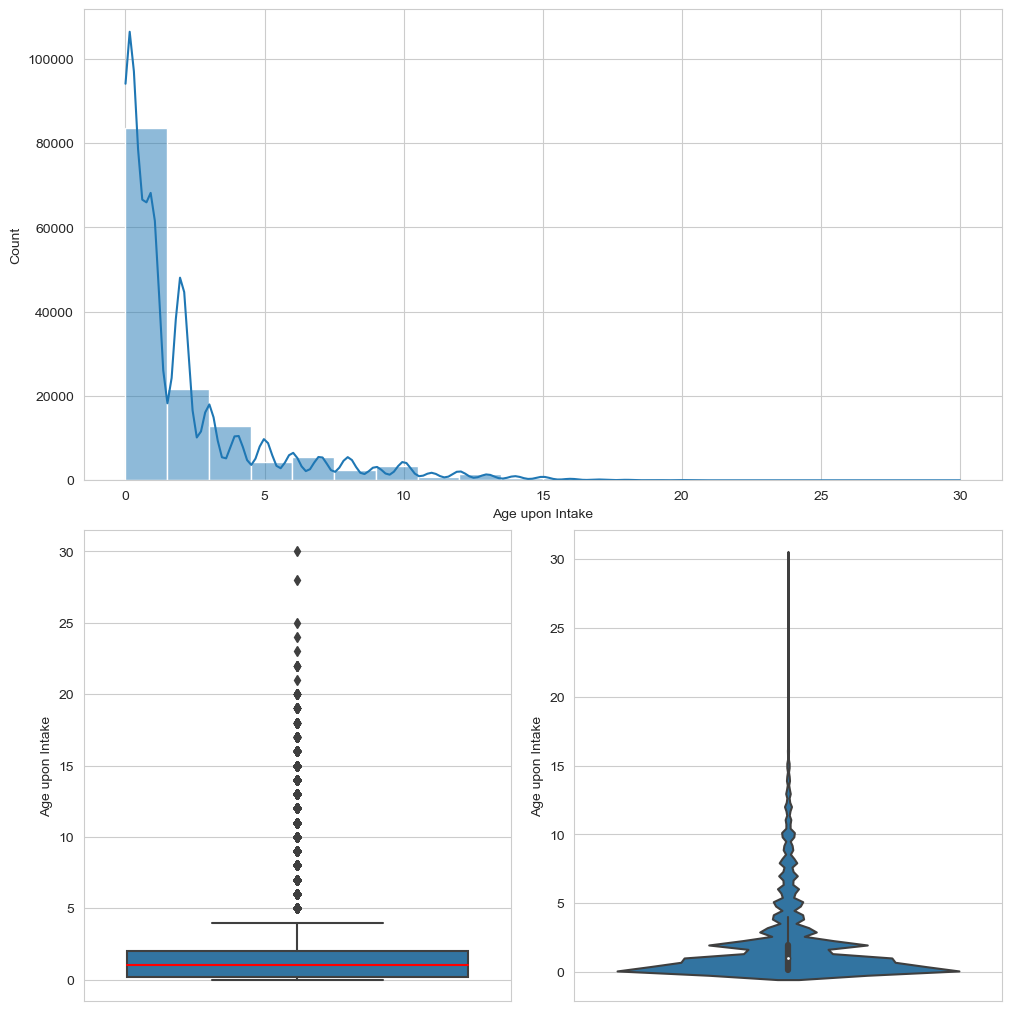

In [22]:
univariate_cont(intakes, 'Age upon Intake')

Z grafů je viditelně, že věk zvířat přijatých do útulku je ve většině případů od jednoho roku do dvou let.
Následně s přibývajícím věkem ubývá počet zvířat přijatých do útulku.

* Popišu příznak `DateTime` z datasetu **intakes** pomocí univariačních deskriptivních statistik.

In [23]:
# univariační popisné statistiky pro spojitá data
def univariate_cont_datetime(df, column):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()],
        ["Maximal value", df[column].max()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()]
    ]), columns=['Title', 'Value'])

    display(stats_df)

    # inicializace rozložení obrázku
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :])

    sns.histplot(data=df, x=column, kde=True, ax=ax1)

,Title,Value
0,Minimal value,2013-10-01 07:51:00
1,Maximal value,2022-04-27 07:54:00
2,Range,3130 days 00:03:00
3,Average,2017-09-03 04:33:46.595749120
4,Median,2017-07-20 16:44:00


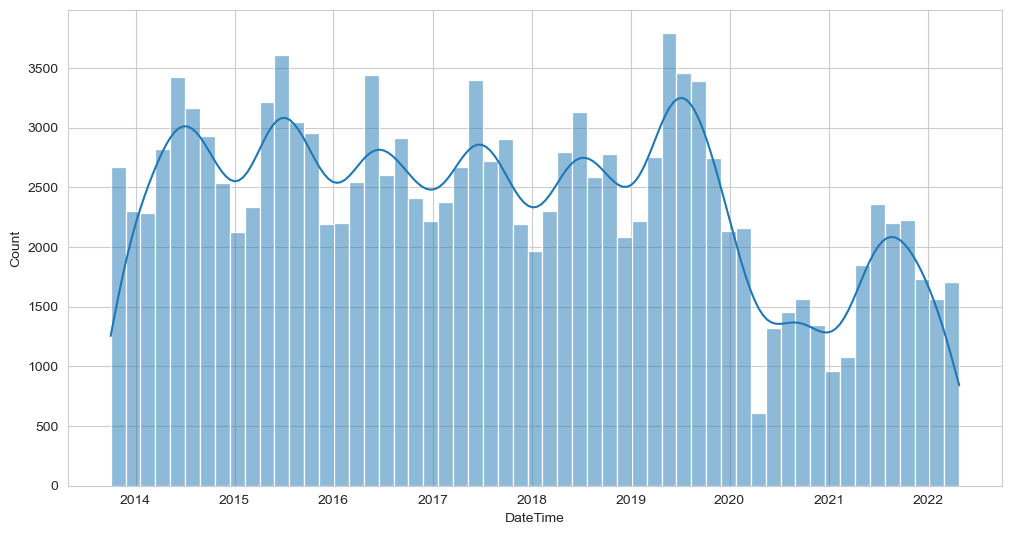

In [24]:
univariate_cont_datetime(intakes, 'DateTime')

První zápis je datován 1. října 2013, poslední záznam je z 27. dubna 2022.

Z grafu vyplývá, že na podzim roku 2019, bylo do útulku přijato nejvíce zvířat.
Viditelný je i obecný trend - každoročně v letě se zvyšuje počet zvířat přijatých do útulku.
Dd roku 2020 do roku 2021 došlo k poklesu počtu zvířat přijatých do útulku, ale poté do roku 2022 začal počet přijatých zvířat opět růst.

### Vybrala jsem tři příznaky `Intake Type`, `Animal Type` a `Sex upon Intake`
Popišu jich pomocí univariačních deskriptivních statistik, které jsou pro nich vhodné.

In [25]:
# univariační popisné statistiky pro kategorická data
def univariate_cat(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })

    display(stats_df)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
    # přidá labels nad bary
    ax1.bar_label(ax1.containers[0])
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')

,Frequency,Relative frequency
Stray,95275,0.687583
Owner Surrender,28575,0.206221
Public Assist,8344,0.060217
Wildlife,5372,0.038769
Abandoned,740,0.005340
Euthanasia Request,259,0.001869


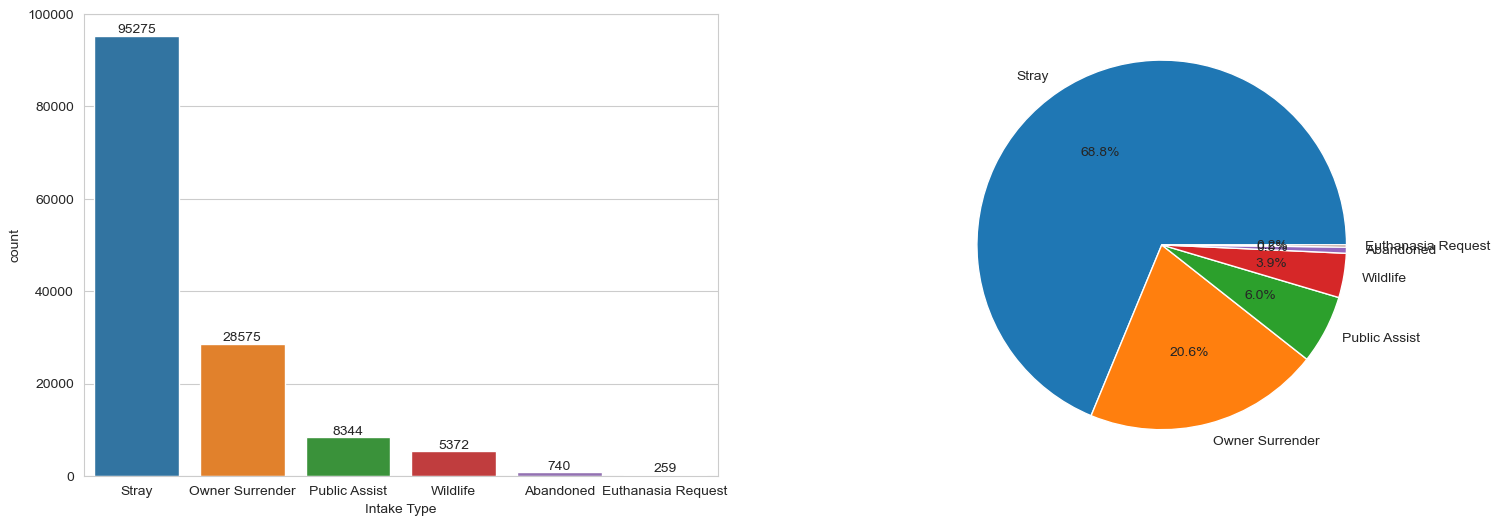

In [26]:
univariate_cat(intakes, 'Intake Type')

Сelkem šest různých druhů zvířat adoptovaných útulkem: `Stray`, `Owner Surrender`, `Public Assist`, `Wildlife`, `Abandoned` a `Euthanasia Request`.
Z grafů je vidět, že naprostá většina přijatých do útulku jsou toulavá zvířata, jejich procent v poměru ke zbývajícím je 68.8%, jejich počet je 95 275.
Druhé místo v počtu zaujímají zvířata s majitelem, jejich procent je 20.6%, počet je 28 575.

,Frequency,Relative frequency
Dog,78135,0.563887
Cat,52373,0.377967
Other,7372,0.053202
Bird,661,0.004770
Livestock,24,0.000173


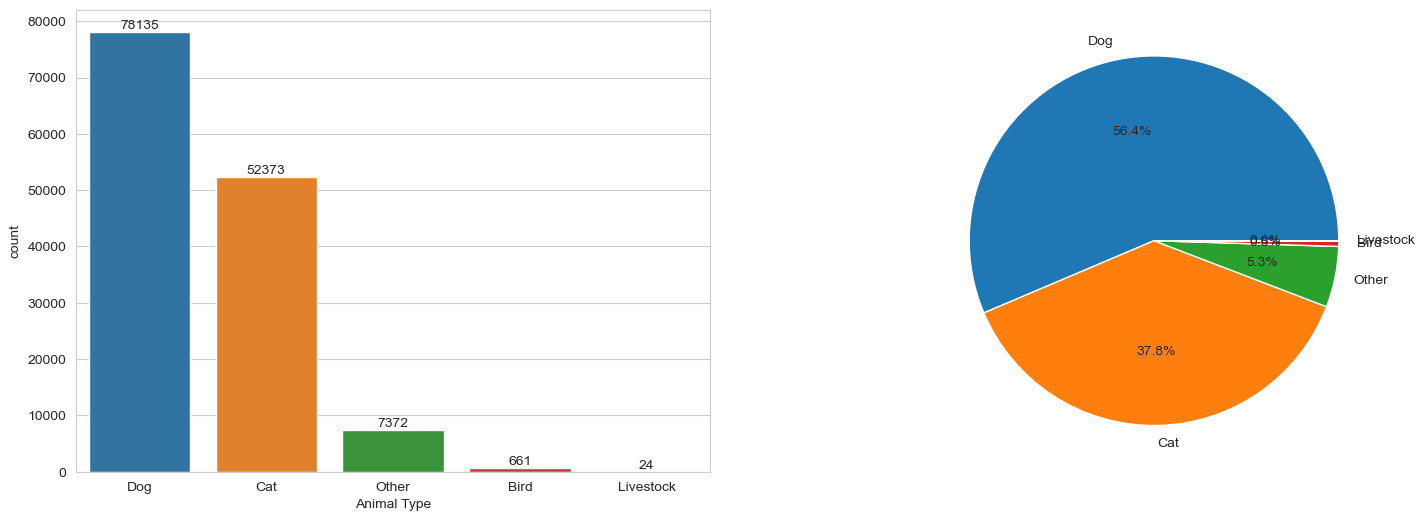

In [27]:
univariate_cat(intakes, 'Animal Type')

Сelkem pět různých plemenů zvířat adoptovaných útulkem: `Dog`, `Cat`, `Other`, `Bird` a `Livestock`.
Do útulku je přijímáno nejvíce psů, je jich 78 135.
Na druhém místě co do počtu adoptovaných zvířat jsou kočky, je jich 52 373.

,Frequency,Relative frequency
Intact Male,45629,0.357880
Intact Female,43303,0.339637
Neutered Male,20835,0.163414
Spayed Female,17731,0.139069


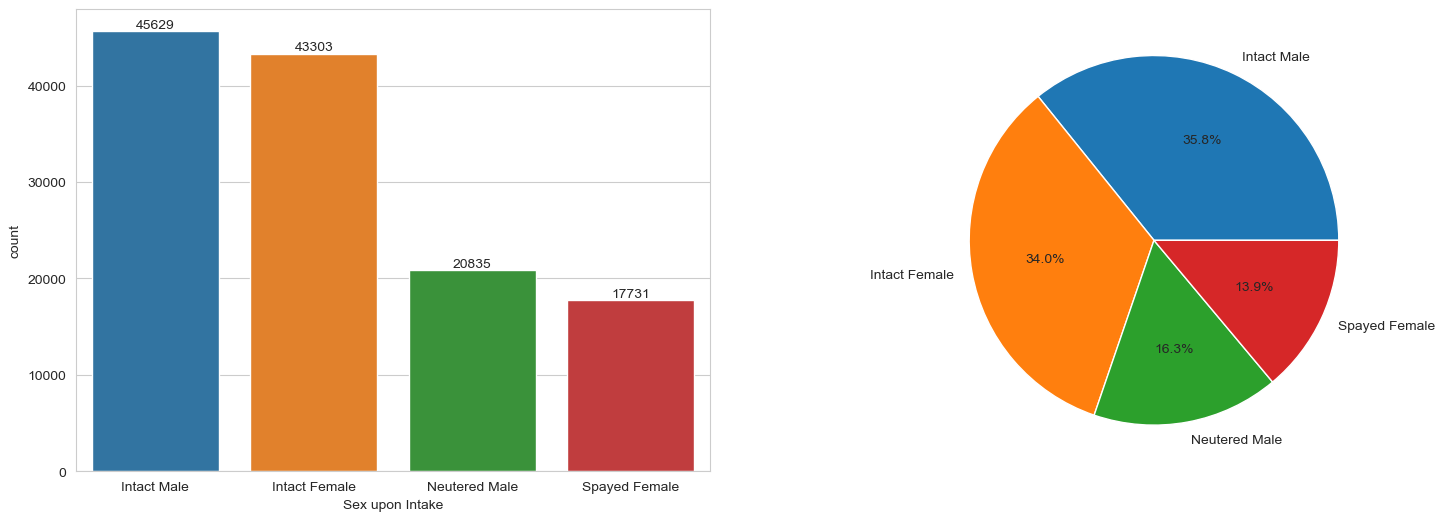

In [28]:
univariate_cat(intakes, 'Sex upon Intake')

Сelkem tři různých typu informace o plodnosti zvíře, kdy bylo přijato do útulku: `Intact Male`, `Intact Female`, `Neutered Male` a `Sprayed Female`.
Z grafů vyplývá, že většina zvířat v útulku není kastrovaná, není kastrované samčí a samice mají přibližně stejný procent 35.8% (samčí) vs 34.0% (samice),
kastrované samčí a samice mají také přibližně schodný procent 16.3% (samčí) vs 13.9% (samice).

## Bivariační popisné statistiky

Vybrala jsem dva příznaky `Intake Type` a `Intake Condition`, mezi kterými je korelace.
Popišu jejich vztah pomocí bivariačních deskriptivních statistik.

In [29]:
# Bivariační popisné statistiky pro kategorická data
def bivariate_cat(df, categorical1, categorical2):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,6))
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)

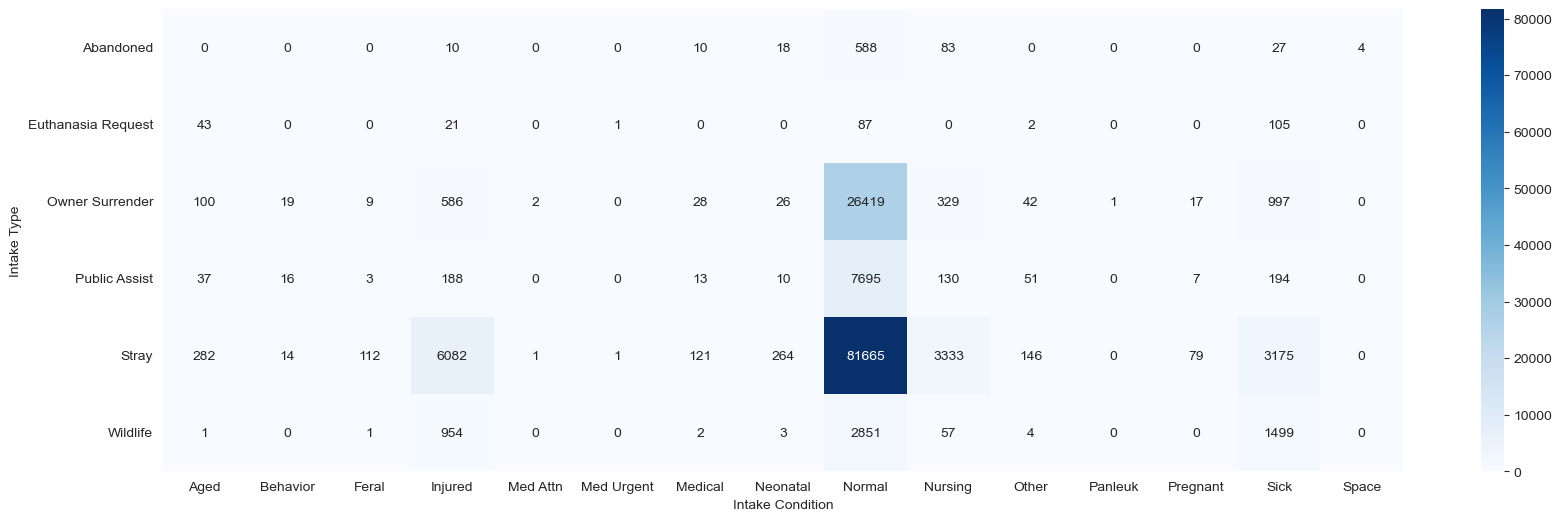

In [30]:
bivariate_cat(intakes, 'Intake Type', 'Intake Condition')

Z grafu je vidět, že
   * 81 665 zvířat, nalezených na ulici, má při převozu do útulku normální stav;
   * 26 419 zvířat převzatých od majitele je v normálním stavu;
   * 7 695 zvířat přijatých do útulku z veřejné pomoci (Public Assist) bylo v normálním stavu;
   * většina zraněných (`Injured` 6 082), kojících (`Nursing` 3 333) a nemocných (`Sick` 3 175) zvířat byla odvezena z ulice (Stray).

## Zadané otázky

### Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)?

In [31]:
# odstraním duplicitní ID
uId_intakes = intakes.drop_duplicates(subset = 'Animal ID')
uId_outcomes = outcomes.drop_duplicates(subset = 'Animal ID')

In [32]:
# spojím datasety intakes a outcomes na základě Animal ID
intakes_merge_outcomes = uId_intakes.merge(uId_outcomes, how = 'inner', on = 'Animal ID')

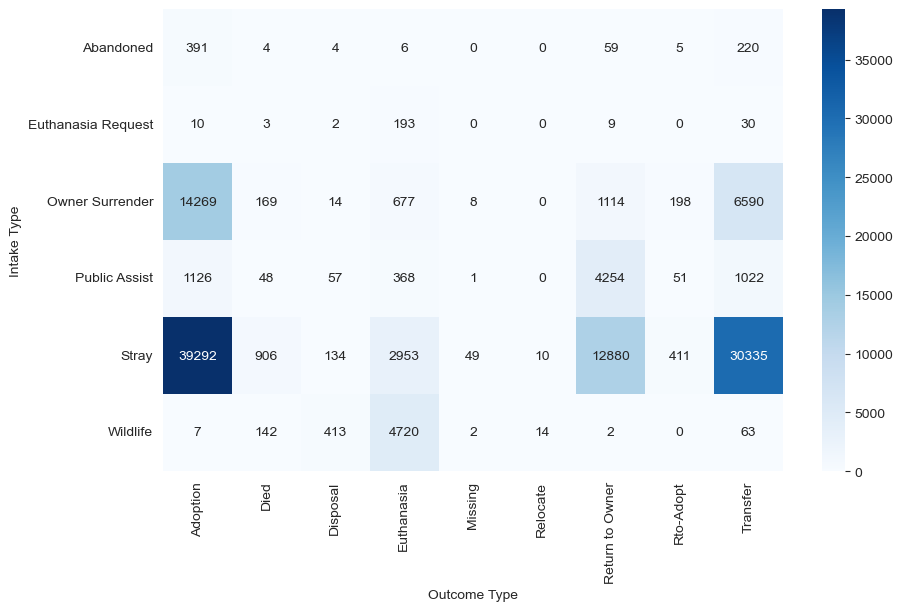

In [33]:
merged_t = pd.crosstab(intakes_merge_outcomes['Intake Type'], intakes_merge_outcomes['Outcome Type'])
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(merged_t, cmap='Blues', annot=True, fmt='g', ax=ax)

Z grafu vyplývá, že korelace mezi oběma znaky není vysoká.
Je možné přidělit počet adoptovaných zvířat bez domova (`Stray`), je jich 39 292, ve srovnání s jinými poměry je tato korelace poměrně vysoká.
Můžu také zvýraznit počet transferovaných (`Transfer`) toulavých zvířat, jejich počet je 30 335.

### Hraje věk zvířete roli při adopci?

In [34]:
# styling
sns.set_style("darkgrid")
palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

In [35]:
# vyběru Outcome Type 'Adoption', který mě zajímá
adopted_animals = outcomes[outcomes['Outcome Type'] == 'Adoption'].copy()
adopted_animals['Outcome Type'] = 'Adoption'

In [36]:
#  Bivariační popisné statistiky
def bivariate_cat_cont(df, categorical, continuous):
    # počet unikátních kategorií
    n_categories = df[categorical].nunique()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

    # box plot
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=ax1)
    medians = df.groupby(categorical)[continuous].median()

    # posun od mediánu pro zobrazení
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')

    # violin plot
    sns.violinplot(data=df, x=categorical, y=continuous, ax=ax2)

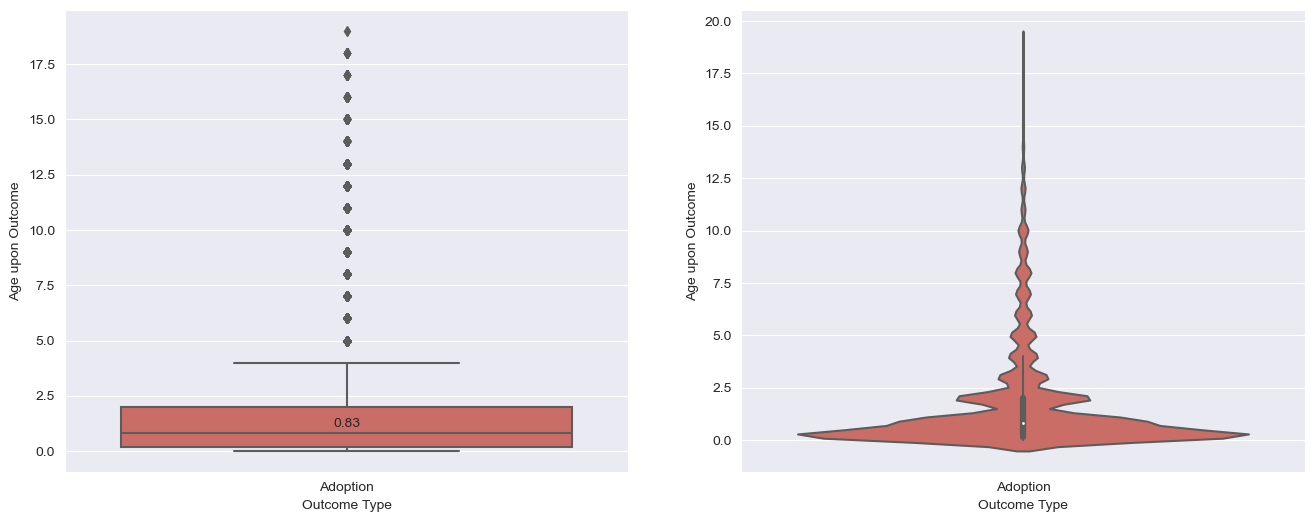

In [37]:
bivariate_cat_cont(adopted_animals, 'Outcome Type', 'Age upon Outcome')

Z grafů vyplývá, že při rozhodování o adopci hraje roli věk zvířete.
Nejvíce si domů berou zvířata do 2.5 roků. Z toho nejvíce u zvířat mladších jednoho roku.

### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?


In [38]:
in_months = intakes
in_months['Month'] = pd.DatetimeIndex(in_months['DateTime']).month

,Frequency,Relative frequency
6,13419,0.096843
5,13395,0.096669
10,13111,0.094620
7,12331,0.088991
9,12047,0.086941
8,11860,0.085592
4,11251,0.081197
11,10993,0.079335
3,10944,0.078981
12,10105,0.072926


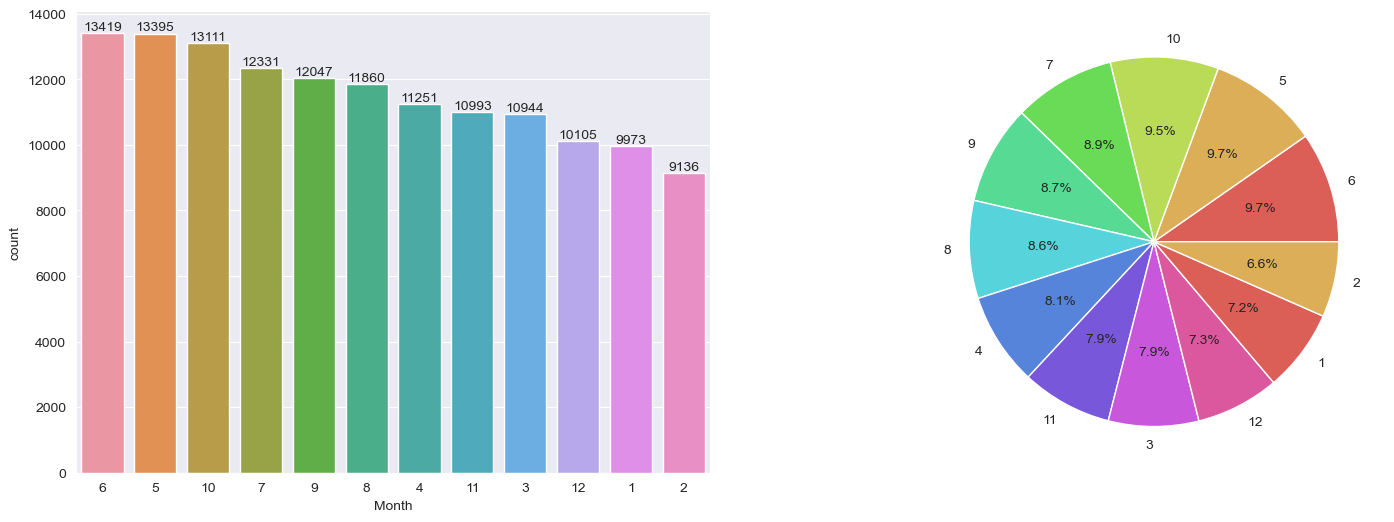

In [39]:
univariate_cat(in_months, 'Month')

Mezi měsíci není znatelný rozdíl. to znamená, že během roku je počet zvířat přijatých do útulku podobný.
Z grafu můžu zjistit rozdíl v počtu přijatých zvířat mezi červnem (6. měsíc), kdy bylo přijato nejvíce zvířat, a únorem (2. měsíc), kdy bylo přijato nejméně zvířat.

## Vlastní otázky

### Hraje plemeno zvířete roli při Euthanasie?

In [40]:
# vyběru Outcome Type 'Euthanasia', který mě zajímá
eutanasia_animals = outcomes[outcomes['Outcome Type'] == 'Euthanasia'].copy()
eutanasia_animals['Outcome Type'] = 'Euthanasia'

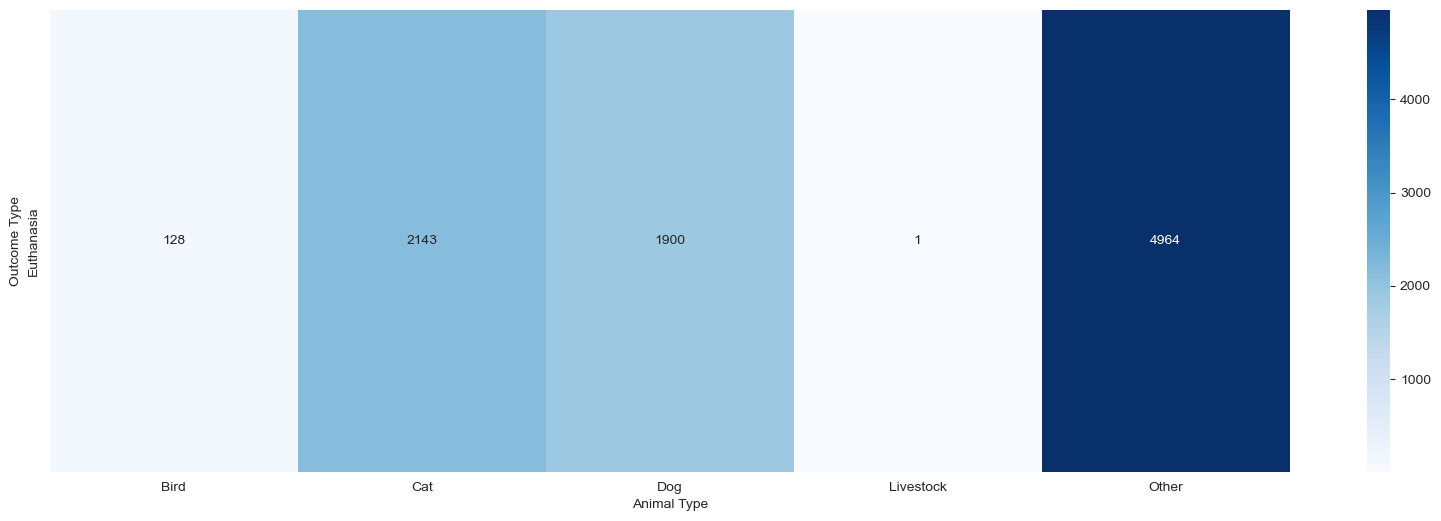

In [41]:
# Bivariační popisné statistiky pro dvě kategoriální proměnné
bivariate_cat(eutanasia_animals, 'Outcome Type', 'Animal Type')

Z určených plemen zvířat bylo více odsouzeno k eutanazii koček (2 143), existuje další plemena zvířat (`Other`) bez výslovného označení plemene,
ale z toho nelze s jistotou říci. Z dostupných údajů neexistuje žádná závislost, že určité plemeno bude odsouzeno k eutanazii vícekrát než ostatní.

### Věk koček po opuštění útulku

In [42]:
# Bivariační popisné statistiky pro kategorické a spojité proměnné
def bivariate_cat_cont_ds(df, categorical, continuous):
    # počet unikátních kategorií
    n_categories = df[categorical].nunique()
    fig, axes = plt.subplots(3, 2, figsize=(16,16))

    # box plot
    box_plot = sns.boxplot(data=df, x=categorical, y=continuous, ax=axes[0][0])
    medians = df.groupby(categorical)[continuous].median()

    # posun od mediánu pro zobrazení
    vertical_offset = df[continuous].max() * 0.015

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment='center')

    # violin plot
    sns.violinplot(data=df, x=categorical, y=continuous, ax=axes[0][1])

    # histograms
    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step',
        palette=palette[:n_categories], ax=axes[1][0]
    ).set(title='Histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack',
        palette=palette[:n_categories], ax=axes[1][1]
    ).set(title='Stacked histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, element='step', stat='probability',
        common_norm=False,  palette=palette[:n_categories], ax=axes[2][0]
    ).set(title='Normalized histogram')

    sns.histplot(
        data=df, x=continuous, hue=categorical, multiple='stack', stat='probability',
        common_norm=False, palette=palette[:n_categories], ax=axes[2][1]
    ).set(title='Normalized stacked histogram')

In [43]:
age_cats = outcomes[outcomes['Animal Type'] == 'Cat'].copy()
age_cats['Animal Type'] = 'Cat'

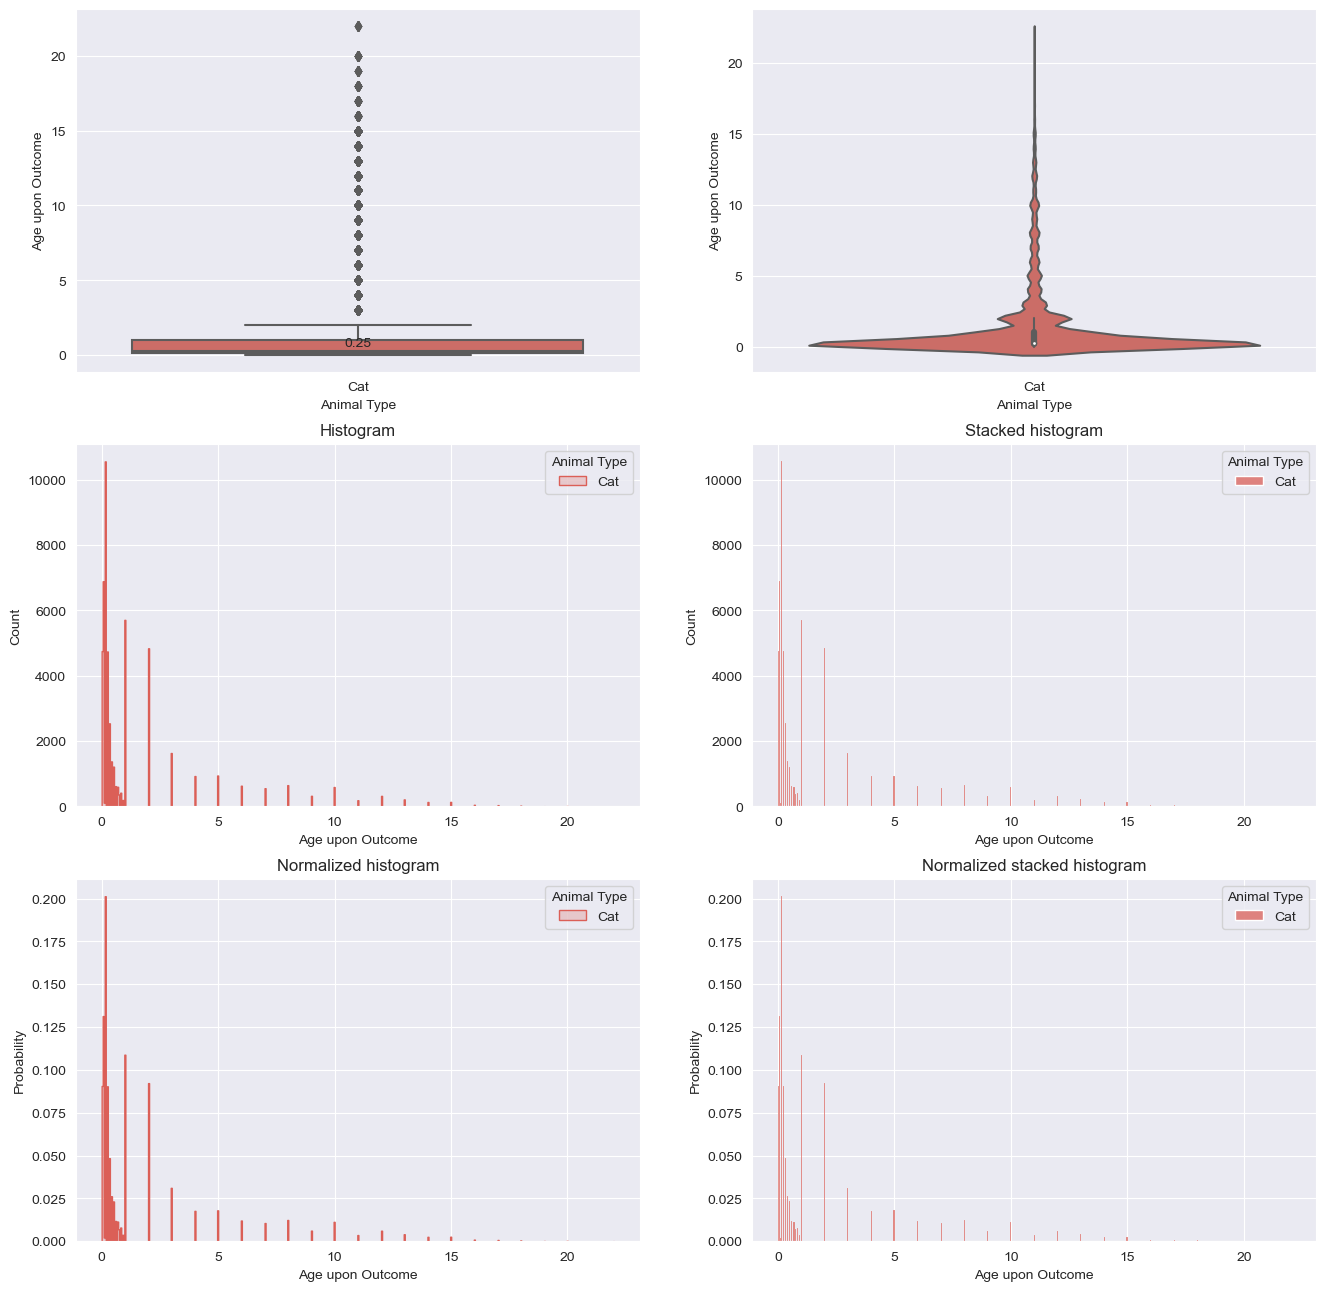

In [44]:
bivariate_cat_cont_ds(age_cats, 'Animal Type', 'Age upon Outcome')

Z grafů vyplývá, že věk koček vypuštěných z útulku se ve většině případů pohybuje mezi nulou a šesti měsíci.
S následným přibývajícím věkem se počet koček snižuje.

### Závisí plodnost zvířat na jejich osudu po útulku?

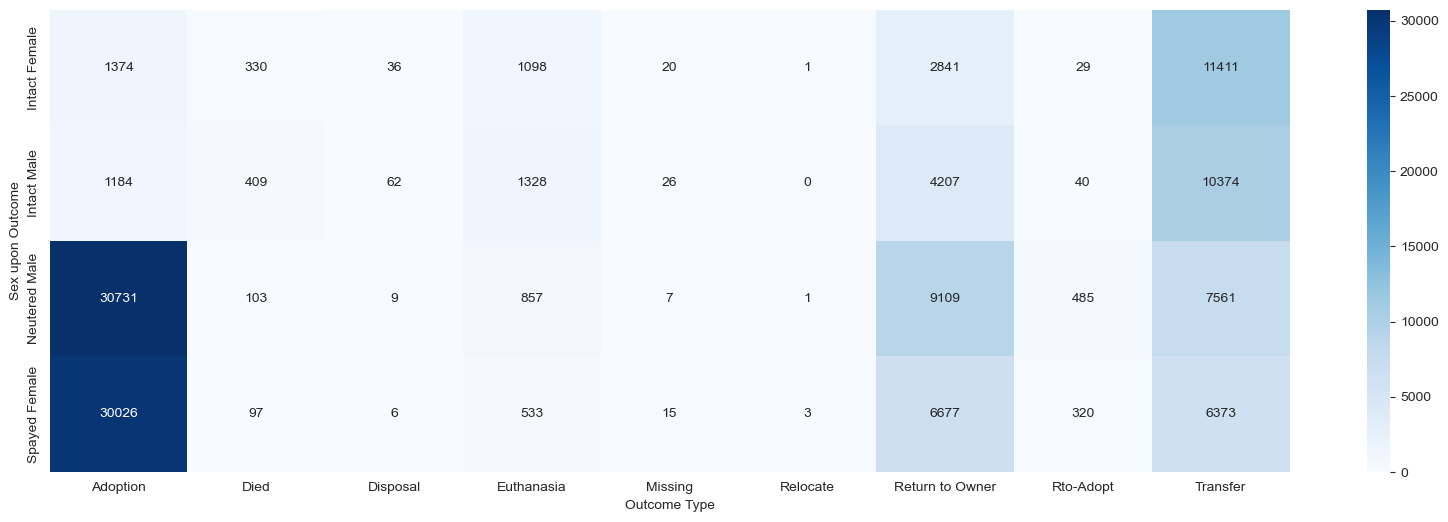

In [45]:
bivariate_cat(outcomes, 'Sex upon Outcome', 'Outcome Type')

Z grafu vyplývá, že je adoptováno více kastrovaných (`Sprayed Female` a `Neutered Male`) zvířat než nekastrovaných.
Pro ostatní Outcome Typy kastrace zvířat nemá velký význam.

## 🎉 A to je vše! 🎉